<a href="https://colab.research.google.com/github/luciekash/WebApp/blob/master/Naive_Bayes_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook: Naive Bayes

## 1. Exploring the Dataset

We've come a long way — we've learned to:

* Assign probabilities to events based on certain conditions by using conditional probability rules.
* Assign probabilities to events based on whether they are in relationship of statistical independence or not with other events.
* Assign probabilities to events based on prior knowledge by using Bayes' theorem.
* Create a spam filter for SMS messages using the multinomial Naive Bayes algorithm.

In our last session, we focused extensively on learning how the Naive Bayes algorithm works from a theoretical standpoint (more specifically, we learned about the multinomial Naive Bayes algorithm). In this project, we're going to study the practical side of the algorithm by building a spam filter for SMS messages.

To classify messages as spam or non-spam, we saw in the previous session that the computer:

1. Learns how humans classify messages.
2. Uses that human knowledge to estimate probabilities for new messages — probabilities for spam and non-spam.
3. Classifies a new message based on these probability values — if the probability for spam is greater, then it classifies the message as spam. Otherwise, it classifies it as non-spam (if the two probability values are equal, then we may need a human to classify the message).

So our first task is to "teach" the computer how to classify messages. To do that, we'll use the multinomial Naive Bayes algorithm along with a dataset of 5,572 SMS messages that are already classified by humans.

The dataset was put together by Tiago A. Almeida and José María Gómez Hidalgo, and it can be downloaded from the The UCI Machine Learning Repository. You can also download the dataset directly from this [link](https://dq-content.s3.amazonaws.com/433/SMSSpamCollection). The data collection process is described in more details on this [page](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/#composition), where you can also find some of the authors' papers.

Let's start by reading in the dataset. 

Note that due to the nature of spam messages, the dataset contains content that may be offensive to some users.

**Tasks**

1. To help readers gain context into your project, use the first Markdown cell of the notebook to add a title and a short introduction where you concisely explain what the project is about and what your goal is in this project (the title and the introduction are tentative at this point, so don't spend too much time here — you can come back at the end of your work to refine them).

2. Open the `SMSSpamCollection` file using the `read_csv()` function from the pandas package.

* The data points are tab separated, so we'll need to use the `sep='\t'` parameter for our `read_csv()` function.

* The dataset doesn't have a header row, which means we need to use the header=None parameter, otherwise the first row will be wrongly used as the header row.

* Use the `names=['Label', 'SMS']` parameter to name the columns as Label and SMS.

3. Explore the dataset a little.

* Find how many rows and columns it has.
* Find what percentage of the messages is spam and what percentage is ham ("ham" means non-spam).

In [ ]:
# Challenge 
# ---
#importing libraries
import pandas as pd
import numpy as np

#reading the data 
sms = pd.read_csv('/content/SMSSpamCollection (1)' , sep ='\t' , names=['label','SMS'])
sms.head()

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#rows and columns
sms.shape

(5572, 2)

In [ ]:
#percentage of the messages is spam and what percentage is ham ("ham" means non-spam)
sms["label"].value_counts(normalize=True)


ham     0.865937
spam    0.134063
Name: label, dtype: float64

## 2. Training and Test Set

In the previous section, we read in the dataset and saw that about 87% of the messages are ham ("ham" means non-spam), and the remaining 13% are spam. Now that we've become a bit familiar with the dataset, we can move on to building the spam filter.

However, before creating it, it's very helpful to first think of a way of testing how well it works. When creating software (a spam filter is software), a good rule of thumb is that designing the test comes before creating the software. If we write the software first, then it's tempting to come up with a biased test just to make sure the software passes it.

Once our spam filter is done, we'll need to test how good it is with classifying new messages. To test the spam filter, we're first going to split our dataset into two categories:

* A training set, which we'll use to "train" the computer how to classify messages.
* A test set, which we'll use to test how good the spam filter is with classifying new messages.

We're going to keep 80% of our dataset for training, and 20% for testing (we want to train the algorithm on as much data as possible, but we also want to have enough test data). The dataset has 5,572 messages, which means that:

* The training set will have 4,458 messages (about 80% of the dataset).
* The test set will have 1,114 messages (about 20% of the dataset).

To better understand the purpose of putting a test set aside, let's begin by observing that all 1,114 messages in our test set are already classified by a human. When the spam filter is ready, we're going to treat these messages as new and have the filter classify them. Once we have the results, we'll be able to compare the algorithm classification with that done by a human, and this way we'll see how good the spam filter really is.

For this project, our goal is to create a spam filter that classifies new messages with an accuracy greater than 80% — so we expect that more than 80% of the new messages will be classified correctly as spam or ham (non-spam).

We'll come back to testing toward the end of this guided project, but for now, let's create a training and a test set. We're going to start by randomizing the entire dataset to ensure that spam and ham messages are spread properly throughout the dataset. 

**Tasks**

1. Start by randomizing the entire dataset by using the `DataFrame.sample()` method.

* Use the `frac=1` parameter to randomize the entire dataset.
* Use the `random_state=1` parameter to make sure your results are reproducible.

2. Split the randomized dataset into a training and a test set.
* The training set should account for 80% of the dataset, and the remaining 20% of the data should be the test set.
* Reset the index labels for both data sets — the index labels remained unordered after randomization. You can use the `DataFrame.reset_index()` method.

3. Find the percentage of spam and ham in both the training and the test set. Are the percentages similar to what we have in the full dataset?

In [ ]:
# Challenge 
# ---
#randomizing the entire dataset

# Randomize the dataset
sms_randomized = sms.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(sms_randomized) * 0.8)

# Training/Test split
training_set = sms_randomized[:training_test_index].reset_index(drop=True)
test_set = sms_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)


(4458, 2)
(1114, 2)


In [ ]:
#Finding  the percentage of spam and ham in both the training and the test set. 
#Are the percentages similar to what we have in the full dataset
training_set["label"].value_counts(normalize=True)


ham     0.86541
spam    0.13459
Name: label, dtype: float64

In [ ]:
test_set["label"].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: label, dtype: float64

the result is similar to what we have in the full dataset

## 3. Letter Case and Punctuation

In the previous section, we split our dataset into a training set and a test set. The next big step is to use the training set to teach the algorithm to classify new messages.

Recall from the previous section that when a new message comes in, our Naive Bayes algorithm will make the classification based on the results it gets to these two equations (note that we replaced "SpamC" with "Ham" inside the second equation below):

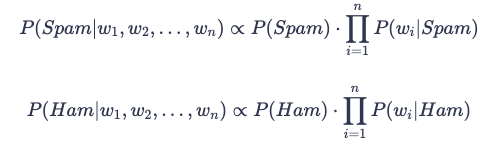

Also, to calculate P(wi|Spam) and P(wi|Ham) inside the formulas above, recall that we need to use these equations:

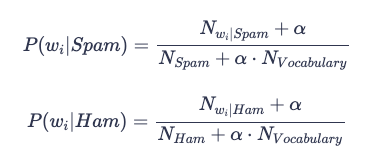

Let's also summarize what the terms in the equations above mean:

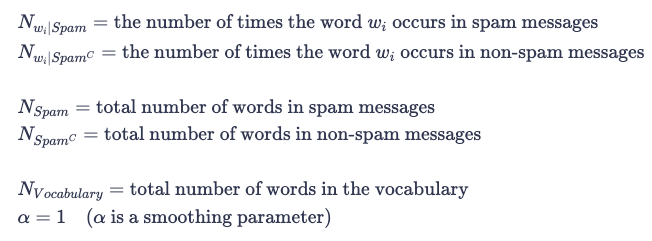

To calculate all these probabilities, we'll first need to perform a bit of data cleaning to bring the data in a format that will allow us to extract easily all the information we need. Right now, our training and test sets have this format (the messages are fictitious to make the example easier to understand):

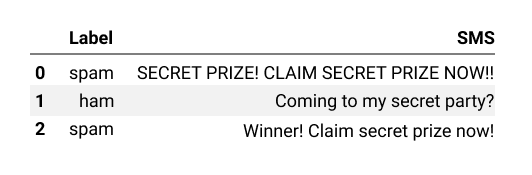


To make the calculations easier, we want bring the data to this format (the table below is a transformation of the table you see above):

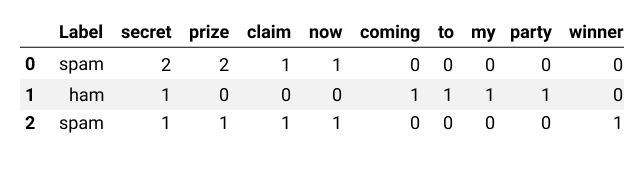

About the transformation above, notice that:

* The SMS column doesn't exist anymore.
* Instead, the SMS column is replaced by a series of new columns, where each column represents a unique word from the vocabulary.
* Each row describes a single message. For instance, the first row corresponds to the message "SECRET PRIZE! CLAIM SECRET PRIZE NOW!!", and it has the values spam, 2, 2, 1, 1, 0, 0, 0, 0, 0. These values tell us that:
The message is spam.
The word "secret" occurs two times inside the message.
The word "prize" occurs two times inside the message.
The word "claim" occurs one time inside the message.
The word "now" occurs one time inside the message.
The words "coming", "to", "my", "party", and "winner" occur zero times inside the message.

* All words in the vocabulary are in lower case, so "SECRET" and "secret" come to be considered to be the same word.
* Punctuation is not taken into account anymore (for instance, we can't look at the table and conclude that the first message initially had three exclamation marks).
Let's begin the data cleaning process by removing the punctuation and bringing all the words to lower case.

**Tasks**

1. Remove all the punctuation from the SMS column. You can use the regex `'\W'` to detect any character that is not from `a-z`, `A-Z` or `0-9`.

* For instance, the function `re.sub('\W', ' ', 'Secret!! Money, goods.' )` strips the punctuation marks and outputs the string 'Secret Money goods '.
* For simplicity, you can use the `Series.str.replace()` method.

2. For each message, transform every letter in every word to lower case. You may want to use the `Series.str.lower()` method.




In [ ]:
# Challenge 
# ---
#
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ')
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


## 4. Creating The Vocabulary

In the previous section, we removed the punctuation and changed all letters to lowercase. Recall that our end goal with this data cleaning process is to bring our training set to this format:

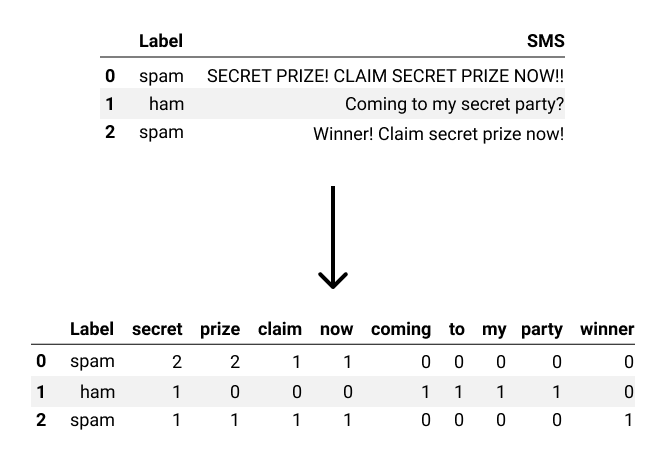

With the exception of the "Label" column, every other column in the transformed table above represents a unique word in our vocabulary (more specifically, each column shows the frequency of that unique word for any given message). Recall in the past that we call the set of unique words a vocabulary.

We'll eventually bring the training set to that format ourselves, but first, let's create a list with all of the unique words that occur in the messages of our training set.

**Tasks**
 
1. Create a vocabulary for the messages in the training set. The vocabulary should be a Python list containing all the unique words across all messages, where each word is represented as a string.
* Begin by transforming each message from the SMS column into a list by splitting the string at the space character — use the `Series.str.split()` method.
* Initiate an empty list named vocabulary.
* Iterate over the the SMS column (each message in this column should be a list of strings by the time you start this loop).
Using a nested loop, iterate each message in the SMS column (each message should be a list of strings) and append each string (word) to the vocabulary list.
* Transform the vocabulary list into a set using the `set()` function. This will remove the duplicates from the vocabulary list.
* Transform the vocabulary set back into a list using the `list()` function.

In [ ]:
# Challenge
# ---
#creating the vocabulary, which in this context means a list with all the unique words in our training set
#by using the Series.str.split() method we are transforming each message from the SMS column into a list by splitting the string at the space character
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
    for word in sms:
        vocabulary.append(word)
        
vocabulary = list(set(vocabulary))

#checking how many unique words are in the messages of our training set
len(vocabulary)


7783

## 5. The Final Training Set

In the previous section, we managed to create the vocabulary for our messages in the training set. Now we're going to use the vocabulary to make the data transformation we need:

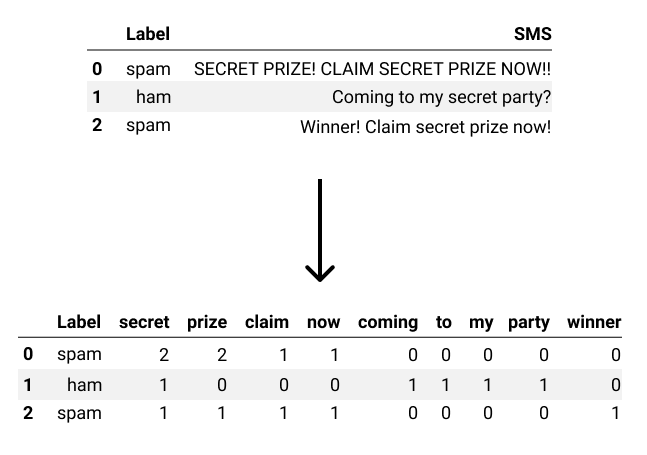

Eventually, we're going to create a new DataFrame. However, we'll first build a dictionary that we'll then convert to the DataFrame we need.

For instance, to create the table we see above, we could use this dictionary and then convert it to a DataFrame:

In [ ]:
word_counts_per_sms = {'secret': [2,1,1],
                       'prize': [2,0,1],
                       'claim': [1,0,1],
                       'now': [1,0,1],
                       'coming': [0,1,0],
                       'to': [0,1,0],
                       'my': [0,1,0],
                       'party': [0,1,0],
                       'winner': [0,0,1]
                      }


word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,secret,prize,claim,now,coming,to,my,party,winner
0,2,2,1,1,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0
2,1,1,1,1,0,0,0,0,1


(As you may have noticed from the output above, the Label column is missing, but we'll get to that in the next exercise.)

To create the dictionary we need for our training set, we can use the code below, where:

* We start by initializing a dictionary named `word_counts_per_sms`, where each key is a unique word (a string) from the vocabulary, and each value is a list of the length of training set, where each element in the list is a 0.

> The code `[0] * 5` outputs `[0, 0, 0, 0, 0]`. So the code `[0] * len(training_set['SMS'])` outputs a list of the length of `training_set['SMS']`, where each element in the list will be a 0.

* We loop over training_set['SMS'] using at the same time the `enumerate()` function to get both the index and the SMS message (index and sms).

Using a nested loop, we loop over sms (where sms is a list of strings, where each string represents a word in a message).
We incremenent `word_counts_per_sms[word][index]` by `1`.

In [ ]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
    for word in sms:
        word_counts_per_sms[word][index] += 1

Now that we have the dictionary we need, let's do the final transformations to our training set and then move forward with creating the spam filter.

**Tasks**

1. Run the code you see above to get the `word_counts_per_sms` dictionary. In case you want to do a bit of exploration, note that this is a large dictionary, and printing it all is not recommended (you should rather use a for loop and print only the first five or so key-value pairs).

2. Transform `word_counts_per_sms` into a DataFrame using `pd.DataFrame()`.

3. Concatenate the DataFrame we just built above with the DataFrame containing the training set (this way, we'll also have the Label and the SMS columns). Use the `pd.concat()` function.


In [ ]:
# Challenge 
# Transform word_counts_per_sms into a DataFrame using pd.DataFrame()
word_counts = pd.DataFrame(word_counts_per_sms)

#Concatenate the DataFrame we just built above with the DataFrame containing the training set
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,label,SMS,gud,vivekanand,licks,oni,sender,anthony,steak,diamond,exterminator,pookie,suntec,wil,missy,animation,urmom,fold,web,chinky,deposit,thot,perform,08000839402,nr31,title,reduce,lunch,family,bajarangabali,october,with,sq825,faster,jada,rto,subscription,payment,course,0845,...,reformat,rtf,junna,169,removal,buyer,don,plaza,goto,challenging,prey,doubletxt,walk,quick,ey,disconnect,mustprovide,contention,arun,sexual,mon,j89,tops,ppm150,bac,yrs,k61,mandara,sweetheart,dress,jacket,grown,4403ldnw1a7rw18,roomate,purple,url,vu,luxury,sorrows,shore
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 6. Calculating Constants First

Now that we're done with data cleaning and have a training set to work with, we can begin creating the spam filter. Recall that the Naive Bayes algorithm will need to know the probability values of the two equations below to be able to classify new messages:

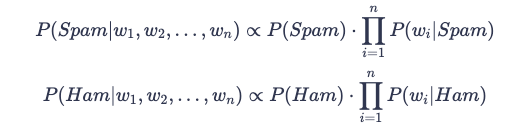

Also, to calculate P(wi|Spam) and P(wi|Ham) inside the formulas above, recall that we need to use these equations:

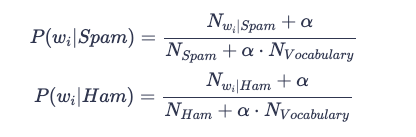

Some of the terms in the four equations above will have the same value for every new message. As a start, let's first calculate:


* P(Spam) and P(Ham)
* NSpam, NHam, NVocabulary

Recall from the previous section that:

* NSpam is equal to the number of words in all the spam messages — it's not equal to the number of spam messages, and it's not equal to the total number of unique words in spam messages.
* NHam is equal to the number of words in all the non-spam messages — it's not equal to the number of non-spam messages, and it's not equal to the total number of unique words in non-spam messages.

We'll also use Laplace smoothing and set `α = 1`.

**Tasks**

Using the training set only:

1. Calculate `P(Spam)` and `P(Ham)`. There's more than one way to write the code that can calculate this — feel free to choose any solution you want.
2. Calculate `NSpam`, `NHam`, `NVocabulary`. Feel free to choose any programming solution you like.
3. Initiate a variable named alpha with a value of 1.

In [ ]:
# Challenge 
# ---
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

## 7. Calculating Parameters

In the previous section, we managed to calculate a few terms for our equations:

* P(Spam) and P(Ham)
* NSpam, NHam, NVocabulary

As we've already mentioned, all these terms will have constant values in our equations for every new message (regardless of the message or each individual word in the message).

However, `P(wi|Spam)` and `P(wi|Ham)` will vary depending on the individual words. For instance, P("secret"|Spam) will have a certain probability value, while `P("cousin"|Spam)` or `P("lovely"|Spam)` will most likely have other values.

Although both `P(wi|Spam)` and `P(wi|Ham)` vary depending on the word, the probability for each individual word is constant for every new message.

For instance, let's say we receive two new messages:

* "secret code"
* "secret party 2night"

We'll need to calculate `P("secret"|Spam)` for both these messages, and we can use the training set to get the values we need to find a result for the equation below:

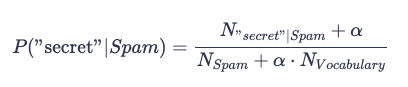

The steps we take to calculate `P("secret"|Spam)` will be identical for both of our new messages above, or for any other new message that contains the word "secret". The key detail here is that calculating `P("secret"|Spam)` only depends on the training set, and as long as we don't make changes to the training set, `P("secret"|Spam)` stays constant. The same reasoning also applies to `P("secret"|Ham)`.

This means that we can use our training set to calculate the probability for each word in our vocabulary. If our vocabulary contained only the words "lost", "navigate", and "sea", then we'd need to calculate six probabilities:

* P("lost"|Spam) and P("lost"|Ham)
* P("navigate"|Spam) and P("navigate"|Ham)
* P("sea"|Spam) and P("sea"|Ham)

We have 7,783 words in our vocabulary, which means we'll need to calculate a total of 15,566 probabilities. For each word, we need to calculate both `P(wi|Spam)` and `P(wi|Ham)`.

In more technical language, the probability values that `P(wi|Spam)` and `P(wi|Ham)` will take are called parameters.

The fact that we calculate so many values before even beginning the classification of new messages makes the Naive Bayes algorithm very fast (especially compared to other algorithms). When a new message comes in, most of the needed computations are already done, which enables the algorithm to almost instantly classify the new message.

If we didn't calculate all these values beforehand, then all these calculations would need to be done every time a new message comes in. Imagine the algorithm will be used to classify 1,000,000 new messages. Why repeat all these calculations 1,000,000 times when we could just do them once at the beginning?

Let's now calculate all the parameters using the equations below:


Recall that `P(wi|Spam)` and `P(wi|Ham)` are key parts of the equations that we need to classify the new messages:

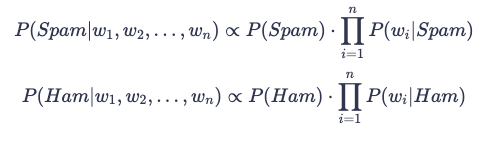



**Tasks**

1. Initialize two dictionaries, where each key-value pair is a unique word (from our vocabulary) represented as a string, and the value is 0. We'll need one dictionary to store the parameters for `P(wi|Spam)`, and the other for P(wi|Ham).

If the entire vocabulary were `['sea', 'navigate']`, we'd need to initialize two dictionaries, one for spam and one for ham, and both should look like this: `{'sea': 0, 'navigate': 0}`.

2. Isolate the spam and the ham messages in the training set into two different DataFrames. The Label column will help you isolate the messages.

3. Iterate over the vocabulary, and, for each word, calculate `P(wi|Spam)` and `P(wi|Ham)` using the formulas we mentioned above.

* Recall that NSpam, NHam, NVocabulary, and α are already calculated from the last lesson.

* Recall from the previous lesson that Nwi|Spam is equal to the number of times the word wi occurs in all the spam messages, while Nwi|Ham is equal to the number of times the word wi occurs in all the ham messages.

* Once you're done with calculating an individual parameter, update the probability value in the two dictionaries you created initially.

In [ ]:
# Challenge 
# ---
#nitialize two dictionaries, where each key-value pair is a unique word (from our vocabulary) represented as a string,
# and the value is 0. We'll need one dictionary to store the parameters for P(wi|Spam), and the other for P(wi|Ham)

# Initiate parameters and Isolate the spam and the ham messages in the training set into two different DataFrames.
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
    n_word_given_spam = spam_messages[word].sum()   
    p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
    parameters_spam[word] = p_word_given_spam
    
    n_word_given_ham = ham_messages[word].sum()   
    p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
    parameters_ham[word] = p_word_given_ham





## 8. Classifying a New Message

Now that we've calculated all the constants and parameters we need, we can start creating the spam filter. The spam filter can be understood as a function that:

* Takes in as input a new message (w1, w2, ..., wn)
* Calculates P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn)
* Compares the values of P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn), and:

If P(Ham|w1, w2, ..., wn) > P(Spam|w1, w2, ..., wn), then the message is classified as ham.

If P(Ham|w1, w2, ..., wn) < P(Spam|w1, w2, ..., wn), then the message is classified as spam.

If P(Ham|w1, w2, ..., wn) = P(Spam|w1, w2, ..., wn), then the algorithm may request human help.

Below, we see a rough sketch of how the spam filter function might look like:

```
import re

def classify(message):

    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    '''    
    This is where we calculate:

    p_spam_given_message = ?
    p_ham_given_message = ?
    '''    

    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)

    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')
```

For the `classify()` function above, note that:

* The input variable message is assumed to be a string.
* We perform a bit of data cleaning on the string message:

We remove the punctuation using the `re.sub()` function.

We bring all letters to lower case using the `str.lower()` method.

We split the string at the space character and transform it into a Python list using the `str.split()` method.

* There's some placeholder code for calculating `p_spam_given_message` and `p_ham_given_message` — we'll write this code in the exercise below.

* We compare `p_spam_given_message` with `p_ham_given_message` and then print a classification label.

To write the code we need for calculating `p_spam_given_message` and `p_ham_given_message`, we need to use these two equations:

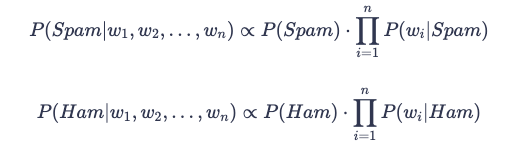

Note that some new messages will contain words that are not part of the vocabulary. Recall from the previous session that we simply ignore these words when we're calculating the probabilities.

Now we'll write the code for calculating `p_spam_given_message` and `p_ham_given_message`, and then we'll use the function to classify two new messages. In the next section, we'll classify all the 1,114 messages in our test set.

**Tasks**

1. Copy the `classify()` function you see above and write the code needed for calculating `p_spam_given_message` and `p_ham_given_message`.

* Initiate `p_spam_given_message` and `p_ham_given_message` with an initial value. We recommend initiating the variables as `p_spam_given_message = p_spam` and `p_ham_given_message = p_ham (p_spam and p_ham are P(Spam)` and `P(Ham)`, and they were calculated on the previous steps).
* Iterate over each word in message (the input of the `classify()` function), which should be a list of strings by the time you start this loop. For each word:

If the word is present in the dictionary containing the spam parameters, then update the value of `p_spam_given_message` by multiplying with the parameter value specific to that word. You'll need to code something similar to `p_spam_given_message *= parameters_spam[word]`.

If the word is present in the dictionary containing the ham parameters, then update the value of `p_ham_given_message` by multiplying with the parameter value specific to that word. You'll need to do something like `p_ham_given_message *= parameters_spam[word]`.

If the word is not present in any of the two dictionaries, then don't do anything. Recall that we ignore words that are not part of the vocabulary.

2. Use the `classify()` function to classify two new messages. You can use any messages you want, but we suggest that one message is obviously spam, and the other is obviously ham. For instance, you can use these two messages:

'WINNER!! This is the secret code to unlock the money: C3421.'
"Sounds good, Tom, then see u there"

In [ ]:
# Challenge 
# ---
#
import re

def classify(message):
    '''
    message: a string
    '''
    
    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
            
    print('P(Spam|message):', p_spam_given_message)
    print('P(Ham|message):', p_ham_given_message)
    
    if p_ham_given_message > p_spam_given_message:
        print('Label: Ham')
    elif p_ham_given_message < p_spam_given_message:
        print('Label: Spam')
    else:
        print('Equal proabilities, have a human classify this!')

In [ ]:
#Use the classify() function to classify two new messages
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [ ]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


## 9. Measuring the Spam Filter's Accuracy

In the previous section, we managed to create a spam filter, and we classified two new messages. We'll now try to determine how well the spam filter does on our test set of 1,114 messages.

The algorithm will output a classification label for every message in our test set, which we'll be able to compare with the actual label (given by a human). Note that, in training, our algorithm didn't see these 1,114 messages, so every message in the test set is practically new from the perspective of the algorithm.

First off, we'll change the `classify()` function that we wrote previously to return the labels instead of printing them. Below, note that we now have return statements instead of `print()` functions:

```
def classify_test_set(message):

    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]

    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'
```
Now that we have a function that returns labels instead of printing them, we can use it to create a new column in our test set.

```
test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()
```

Now we can compare the predicted values with the actual values to measure how good our spam filter is with classifying new messages. To make the measurement, we'll use accuracy as a metric:

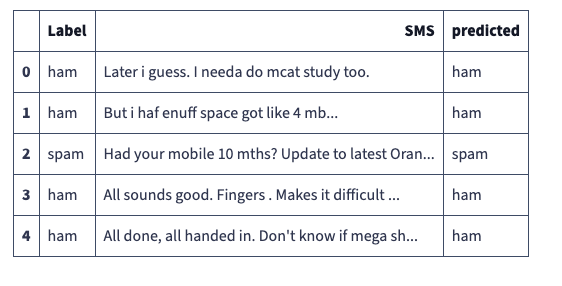

Now we can compare the predicted values with the actual values to measure how good our spam filter is with classifying new messages. To make the measurement, we'll use accuracy as a metric:

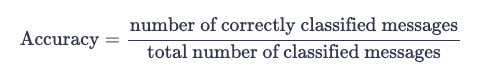

**Tasks**

1. Measure the accuracy of the spam filter.

* Initialize a variable named correct with a value of 0.
* Initialize a variable named total with the number of messages in the test set.
* Iterate over the test set DataFrame (you can use the `DataFrame.iterrows()` method). For each row:
* If the actual label is the same as the predicted label, then increment correct by 1.
* Use `correct` and `total` in combination with the above formula to calculate the accuracy of the spam filter.

2. What do you think about the accuracy value? Is it better or worse than you expected?


In [ ]:
# Challenge 
# ---
#writing a function that returns classification labels instead of printing them
def classify_test_set(message):    
    '''
    message: a string
    '''
    
    message = re.sub('\W', ' ', message)
    message = message.lower().split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]
            
        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]
    
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [ ]:
#Now that we have a function that returns labels instead of printing them, we can use it to create a new column in our test set.

test_set['predicted'] = test_set['SMS'].apply(classify_test_set)
test_set.head()

,label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


In [ ]:
#write a function to measure the accuracy of our spam filter to find out how well our spam filter does
correct = 0
total = test_set.shape[0]
    
for row in test_set.iterrows():
    row = row[1]
    if row['label'] == row['predicted']:
        correct += 1
        
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1100
Incorrect: 14
Accuracy: 0.9874326750448833


## 10. Next Steps

In this project, we managed to build a spam filter for SMS messages using the multinomial Naive Bayes algorithm. The filter had an accuracy of 98.74% on the test set, which is an excellent result. We initially aimed for an accuracy of over 80%, but we managed to do way better than that.

If you want to keep working on this project, here's a few next steps you can take:

* Isolate the 14 messages that were classified incorrectly and try to figure out why the algorithm reached the wrong conclusions.
* Make the filtering process more complex by making the algorithm sensitive to letter case.